# Conclusion

## Comparing all models

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_scores = pd.read_csv(os.path.join("data","results", "model_scores.csv"))

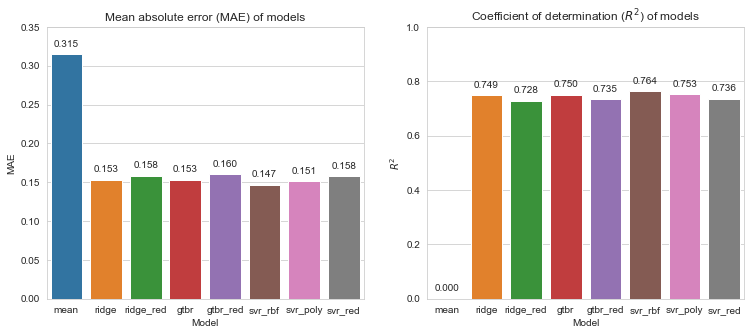

In [3]:
sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

sns.barplot(data=df_scores, x="model", y="mae", ax=ax1)
ax1.set(ylim=(0, 0.35))
ax1.set_title("Mean absolute error (MAE) of models")
ax1.set_xlabel("Model")
ax1.set_ylabel("MAE")
for p in ax1.patches:
    ax1.annotate("{:.3f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.barplot(data=df_scores[df_scores["model"] != "meanx"], x="model", y="r2", palette="tab10", ax=ax2)
ax2.set(ylim=(0, 1))
for p in ax2.patches:
    ax2.annotate("{:.3f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax2.set_title("Coefficient of determination ($R^2$) of models")
ax2.set_xlabel("Model")
ax2.set_ylabel("$R^2$")

plt.show()

- support vector regression (svr) with RBF kernel gave the best results
- linear regression (ridge) and gradient tree boosting regression have similar performance and are close behind
- the models with reduced feature set (\*_red) are only at most 0.01 MAE worse than the full feature models, but they contain features that are complementary, cover different concepts like geography, population size, economy, language, health or religion
    - this leads to better interpretability for all the models

## Room for improvement

There is still a lot of unexplained variance in the political orientation  ($R^2 \approx 0.75$). What could be done to improve on that? What are the issues with the data I used?

- some of the data is not current; statistics that are several years old at the time of the election might be inaccurate and not useful anymore
- some of the data is not available at the commune level; data at the canton or district level cannot help to predict differences of communes inside that reference area
- adding the time dimension: looking at historical election results would certainly improve the prediction quality
- same for using the party affiliation of the commune president (Gemeindepräsident/Stadtpräsident) 
    - but it does not help to explain what "makes" the political orientation
- it would be interesting to use a neural network for regression of the po_value
- could applying a transformation on the target variable help to mitigate the problem that all models predicted too centric on the edges of the political spectrum?